# Acoustic Prelab

Name: Julian Lapenna \
Student ID: 96953443 \
Date & Time: Sept 18, 19:43

You will need to find a small signal buried in the noise, so let’s develop the code to do that. You will want to know the amplitude and phase of an acoustic signal created by a tuning fork. You will measure the acceleration of the fork. That acceleration signal will have
high signal-to noise ratio, but when the microphone is far away the acoustic signal will be dwarfed by room noise. In this exercise you will essentially create a digital ’lock-in amplifier’ to find the acoustic signal. You will generate a sine wave in phase with the (simulated) accelerometer signal, and a cosine wave, 90◦ out of phase, and find these components in your (simulated) acoustic signal.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

**Generate an accelerometer signal:** Make a sin wave data stream, A(t) with an arbitrary amplitude and frequency.

amp:  7.526258634055791
freq:  7


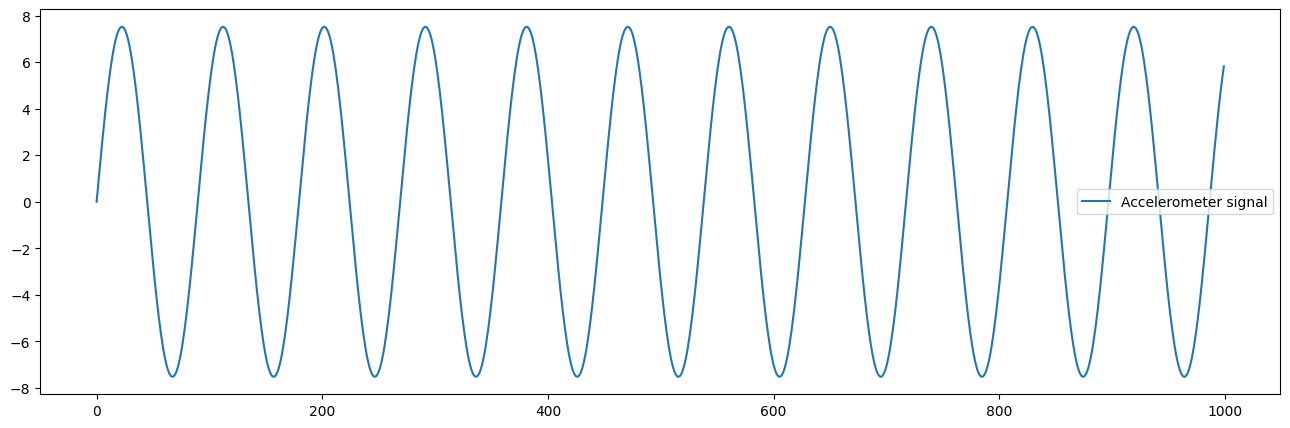

In [2]:
N = 1000
t = np.linspace(0, 10, N)
amplitude = 10*random.random()
frequency = random.randint(5, 25)
print('amp: ', amplitude)
print('freq: ', frequency)
A = amplitude*np.sin(t*frequency)
plt.figure(figsize=(16,5))
plt.plot(A, label='Accelerometer signal')
plt.legend()

**Generate an acoustic signal:** V(t) Make a sinusoid at the same frequency as your accelerometer signal, but with small amplitude and an arbitrary phase shift. Add random noise. Let the noise amplitude be bigger than the signal.

phase shift:  6.041414880353823


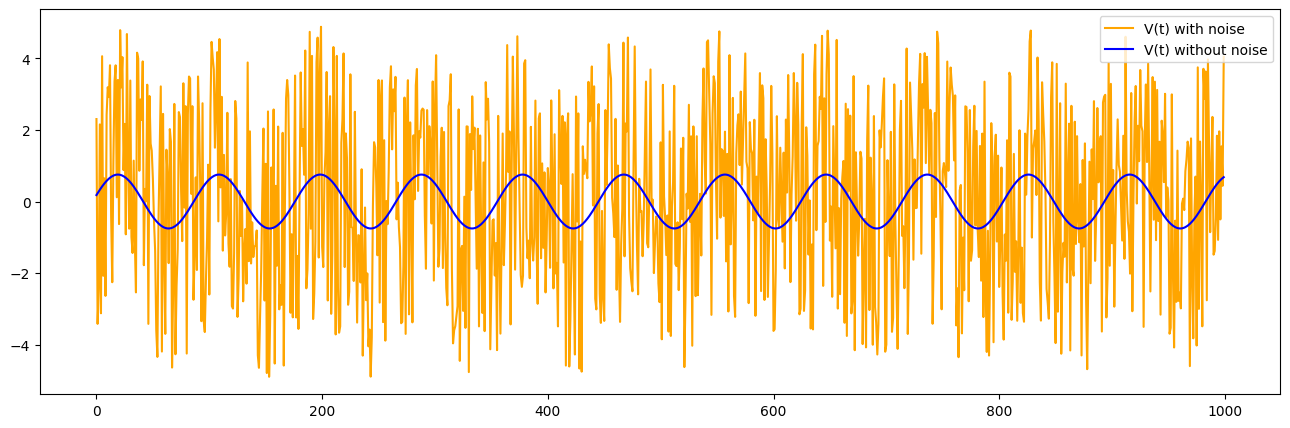

In [3]:
phase_shift = random.random()*10
print('phase shift: ', phase_shift)
noise = (np.random.rand(N) - 0.5) * amplitude * (1 + random.random())
V = amplitude/10*np.sin(t*frequency - phase_shift)
V_noise = V + noise
plt.figure(figsize=(16,5))
plt.plot(V_noise, color='orange', label='V(t) with noise')
plt.plot(V, color='blue', label='V(t) without noise')
plt.legend()
plt.show()

**Generate sine and cosine reference signals.** Assume your accelerometer signal is a sine wave, and make a sine reference function S(t) by dividing A by its amplitude. (S = A/(√2A.std()).) Make a cosine reference by taking the derivative of S. Adjust the amplitude to be 1. Please notice that you have made sine and cosine waves synchronous with the accelerometer signal without using any knowledge you might have of the frequency of the accelerometer signal!

In [4]:
S = A/(np.sqrt(2)*np.std(A))

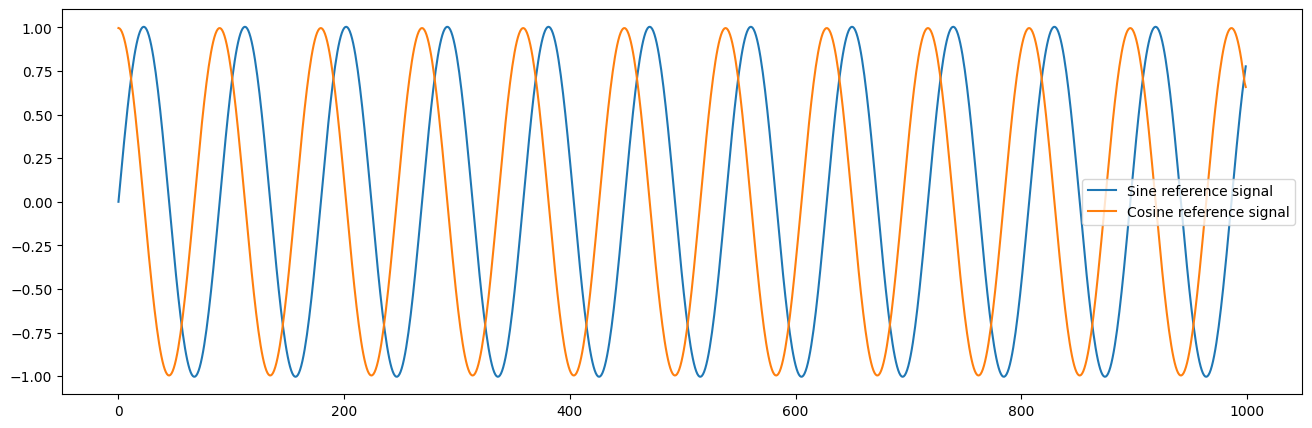

In [5]:
C = np.gradient(S)
C = C/(np.sqrt(2)*np.std(C))

plt.figure(figsize=(16,5))
plt.plot(S, label='Sine reference signal')
plt.plot(C, label='Cosine reference signal')
plt.legend()
plt.show()

**Find the components of S and C in V(t).** Just as you find the components of a Fourier series, you can find the amplitude of a single Fourier component from the integral of the product.

I talked with Liza Belsky about integrating over the signal products, and she told me about numpy's fancy trapezoid function :)

In [6]:
a = np.trapezoid(S*V_noise, t, t[1]-t[0])
b = np.trapezoid(C*V_noise, t, t[1]-t[0])

print('a = ', a, 'b = ', b)

a =  3.752371329389919 b =  1.3442588123637713


**Compare your results to your simulation.** How does aS(t) + bC(t) compare to the sinusoid you put into V(t)? Adjust the amplitude and phase of your simulation and see if you recover what you put in.

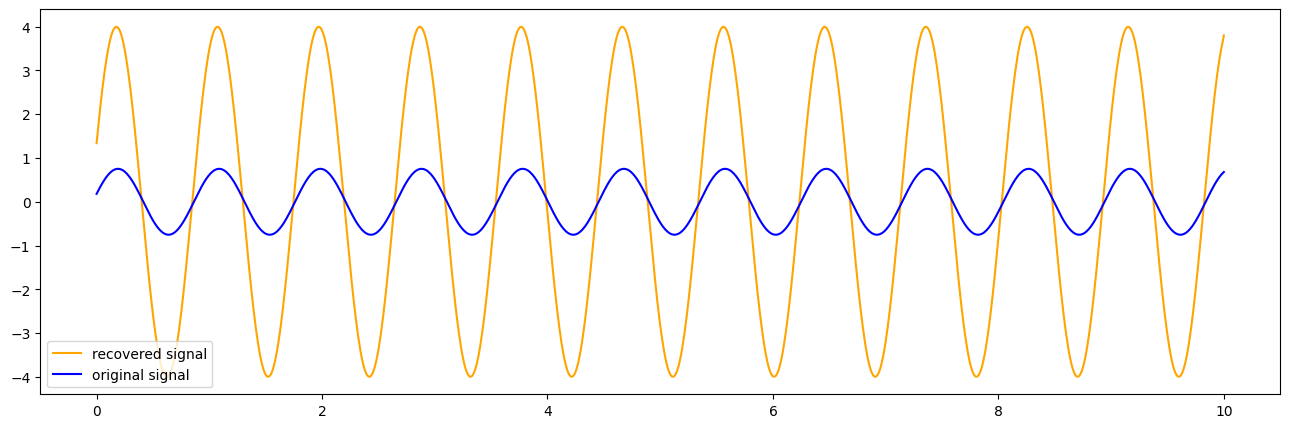

In [7]:
R = a*S + b*C

plt.figure(figsize=(16,5))
plt.plot(t, R, color='orange', label='recovered signal')
plt.plot(t, V, color='blue', label='original signal')
plt.legend()
plt.show()

That looks surprisingly good! The phase looks on point, but the amplitude is a little too small. I can probably approximate the amplitude from the graph to be 0.8, so I'll first try that and then afterwards fine tune if needed.

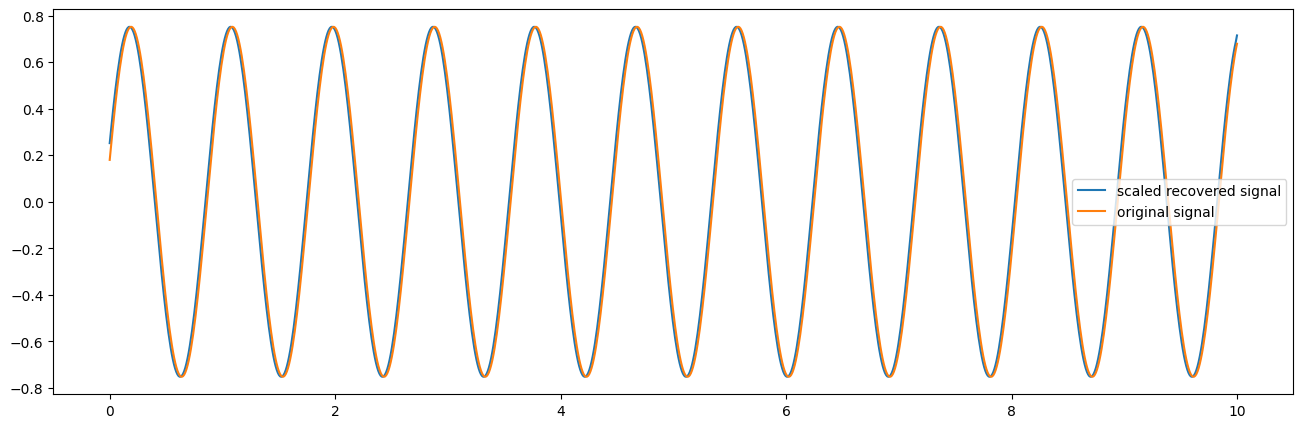

In [8]:
R_norm = max(V)*R/max(R)

plt.figure(figsize=(16,5))
plt.plot(t, R_norm, label='scaled recovered signal')
plt.plot(t, V, label='original signal')
plt.legend()
plt.show()

These match almost perfectly. I tried running the code a few times for other random values and it matches quite well everytime. I will check the difference to see the if there is a phase difference, or any other information I can tease out, but this looks quite good.

In [9]:
recovered_index_max = np.argmax(R_norm[:70])
original_index_max = np.argmax(V[:70])

print((recovered_index_max-original_index_max)/100) # 1000/10 = 100 samples a second

-0.01


It seems there is hardly any phase difference in the recovered signal from the original signal. There is a little bit that shows up, but it is so minute that I think we can count this as a well recovered signal.

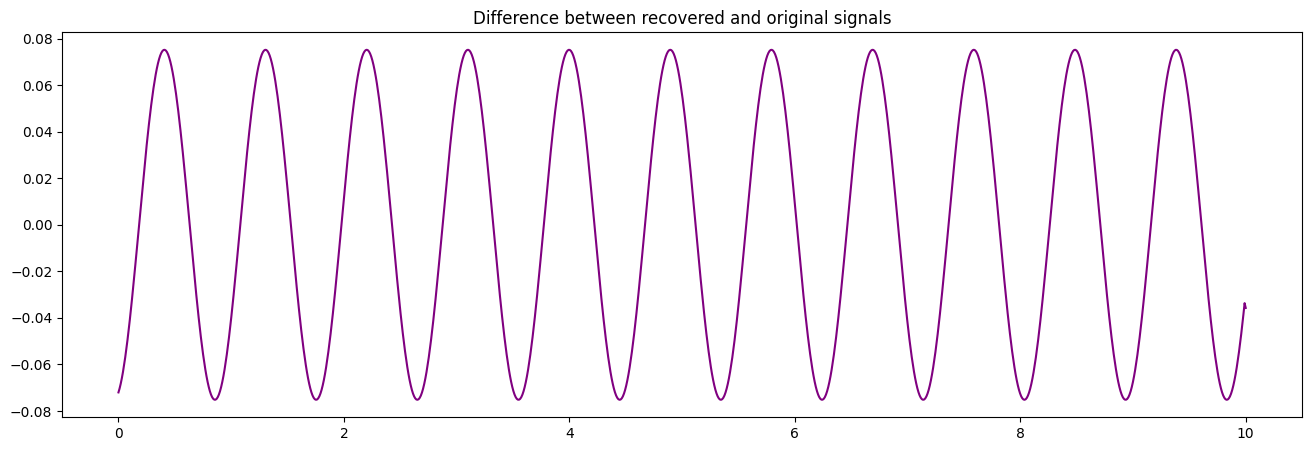

In [10]:
plt.figure(figsize=(16,5))
plt.plot(t, V-R_norm, color='purple')
plt.title('Difference between recovered and original signals')
plt.show()

The only lasting issue seems this extra point at the end, but otherwise I think it's looking good! (maybe it doesn't even appear in all of them?)